In [742]:
### https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

##  Import Statements


In [743]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
sns.set()

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [744]:
pd.options.display.float_format = '{:,.2f}'.format

## Load tha Data


In [745]:
df = pd.read_csv('loan_approval_dataset.csv', index_col=0)

## Preliminary Data Exploration


In [746]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4269 entries, 1 to 4269
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 433.6+ KB


In [747]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [748]:
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [749]:
df.duplicated().sum()


0

In [750]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [751]:
# remove space in col name
df.rename(columns={' no_of_dependents': 'no_of_dependents', ' education': 'education', ' self_employed': 'self_employed', ' income_annum': 'income_annum', ' loan_amount': 'loan_amount',
                   ' loan_term': 'loan_term', ' cibil_score': 'cibil_score', ' residential_assets_value': 'residential_assets_value', ' commercial_assets_value': 'commercial_assets_value',
                   ' luxury_assets_value': 'luxury_assets_value', ' bank_asset_value':'bank_asset_value', ' loan_status': 'loan_status'}, inplace=True)

In [752]:
df.education.unique()


array([' Graduate', ' Not Graduate'], dtype=object)

In [753]:
df.self_employed.unique()


array([' No', ' Yes'], dtype=object)

In [754]:
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [755]:
# create dummy variables to use in quantitative analysis
df_clean = df.copy()
df_clean['education'] = df_clean['education'].map({' Not Graduate': 0, ' Graduate': 1})
df_clean['self_employed'] = df_clean['self_employed'].map({' No': 0, ' Yes': 1})
df_clean['loan_status'] =df_clean['loan_status'].map({' Rejected': 0, ' Approved': 1})

In [756]:
df_clean.sample(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
414,1,1,0,4100000,8400000,20,608,1400000,8000000,10000000,4400000,1
4102,4,1,0,400000,800000,16,685,500000,300000,1300000,600000,1


## Descriptive Statistics

In [757]:
# let's add additional variables which can potentially decrease multicollinearity
df_clean['all_assets'] = df_clean['residential_assets_value'] + df_clean['commercial_assets_value'] + df_clean['bank_asset_value'] + df_clean['luxury_assets_value']
df_clean['income_per_person'] = df_clean['income_annum'] / (df_clean['no_of_dependents']+1)
df_clean['debt_income_ratio'] = df_clean['loan_amount'] / df_clean['income_annum']
df_clean['debt_assets_ratio'] = df_clean['loan_amount'] / df_clean['all_assets']

In [758]:
df_clean.describe(include='all')

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,all_assets,income_per_person,debt_income_ratio,debt_assets_ratio
count,"4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00","4,269.00"
mean,2.50,0.50,0.50,"5,059,123.92","15,133,450.46",10.90,599.94,"7,472,616.54","4,973,155.31","15,126,305.93","4,976,692.43",0.62,"32,548,770.20","2,055,049.97",2.98,0.49
std,1.70,0.50,0.50,"2,806,839.83","9,043,362.98",5.71,172.43,"6,503,636.59","4,388,966.09","9,103,753.67","3,250,185.31",0.48,"19,506,562.87","2,003,232.65",0.60,0.15
min,0.00,0.00,0.00,"200,000.00","300,000.00",2.00,300.00,"-100,000.00",0.00,"300,000.00",0.00,0.00,"400,000.00","33,333.33",1.50,0.18
25%,1.00,0.00,0.00,"2,700,000.00","7,700,000.00",6.00,453.00,"2,200,000.00","1,300,000.00","7,500,000.00","2,300,000.00",0.00,"16,300,000.00","775,000.00",2.46,0.38
50%,3.00,1.00,1.00,"5,100,000.00","14,500,000.00",10.00,600.00,"5,600,000.00","3,700,000.00","14,600,000.00","4,600,000.00",1.00,"31,500,000.00","1,450,000.00",3.00,0.47
75%,4.00,1.00,1.00,"7,500,000.00","21,500,000.00",16.00,748.00,"11,300,000.00","7,600,000.00","21,700,000.00","7,100,000.00",1.00,"47,200,000.00","2,500,000.00",3.50,0.57
max,5.00,1.00,1.00,"9,900,000.00","39,500,000.00",20.00,900.00,"29,100,000.00","19,400,000.00","39,200,000.00","14,700,000.00",1.00,"90,700,000.00","9,900,000.00",4.00,1.33


In [759]:
df_clean.loc[df_clean['residential_assets_value']< 0]['residential_assets_value'].value_counts()

,count
residential_assets_value,
-100000,28


In [760]:
# value -100000 for resodential assets looks strange, probably it means 0
df_clean.loc[df_clean['residential_assets_value']< 0, 'residential_assets_value'] = 0

In [764]:
df_clean.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'all_assets', 'income_per_person', 'debt_income_ratio',
       'debt_assets_ratio'],
      dtype='object')

In [765]:
# let's drop 'residential_assets_value',  'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value' - they all now in all_assets var
df_clean = df_clean[['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'all_assets', 'income_per_person', 'debt_income_ratio',
                     'debt_assets_ratio', 'loan_status']]

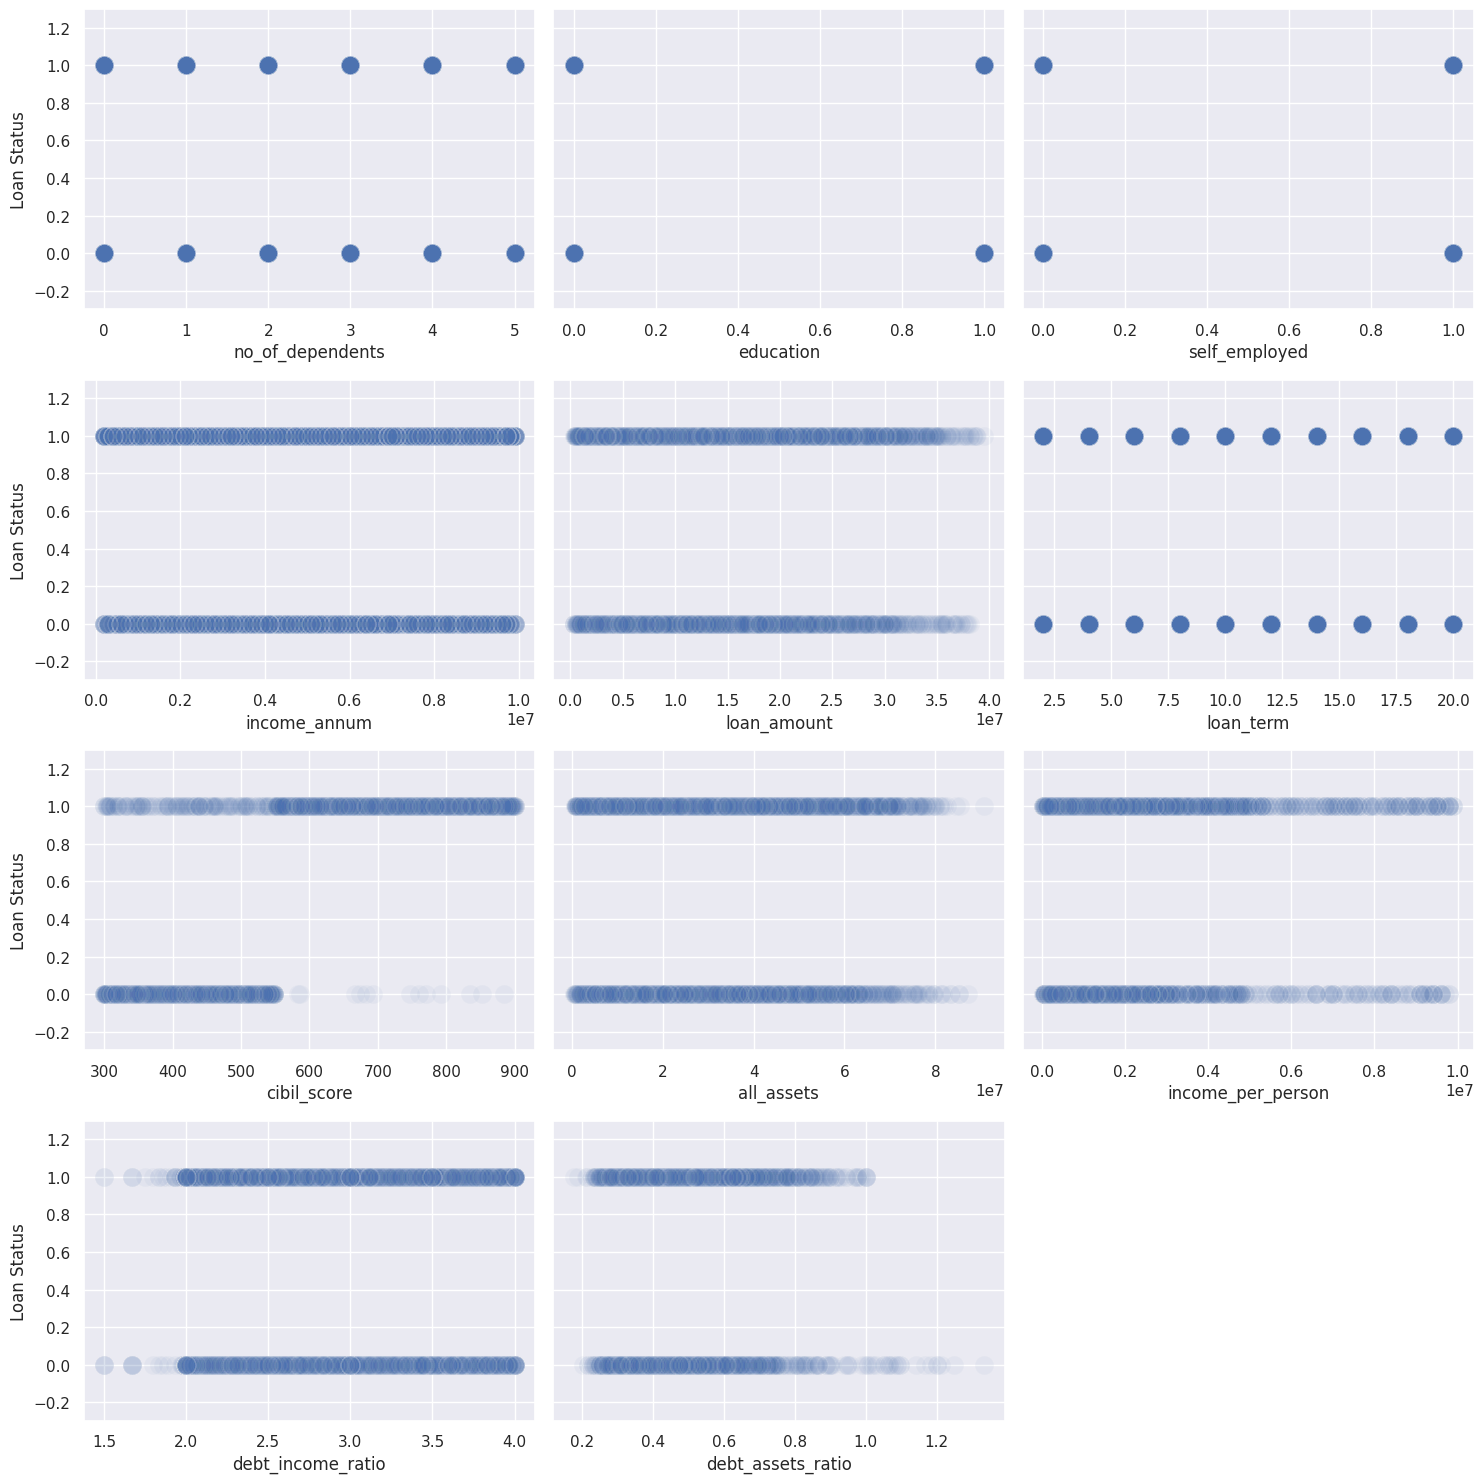

In [766]:
num_cols = 3
num_rows = int(np.ceil((len(df_clean.columns) - 1) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), sharey=True)

# Flatten the axes to a 1D array for easier indexing
axes = axes.flatten()

# Plot each column
for i, col in enumerate(df_clean.columns):
    if col != 'loan_status':
        sns.scatterplot(data=df_clean, x=col, y='loan_status', alpha=0.05, s=185, ax=axes[i])
        axes[i].set_ylabel('Loan Status')
        axes[i].set_xlabel(col)
        axes[i].set_ylim(-0.3, 1.3)
        axes[i].legend([], [], frameon=False)

# Remove any empty subplots
for i in range(len(df_clean.columns) - 1, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Regression

### Declare variables


In [795]:
x = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

### Scale the data

In [796]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [797]:
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

### Split the data


In [798]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=365)

In [799]:
X_train.shape, X_test.shape

((3842, 11), (427, 11))

### Multicollinearity assesment


In [800]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(train):
  vif = pd.DataFrame()
  vif["feature"] = train.columns
  vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
  return vif

In [801]:
vifs = check_vif(X_train)
vifs.sort_values(by='VIF', ascending=False)

,feature,VIF
3,income_annum,42.85
4,loan_amount,27.76
7,all_assets,20.27
9,debt_income_ratio,6.07
10,debt_assets_ratio,4.65
8,income_per_person,3.60
0,no_of_dependents,2.42
5,loan_term,1.00
6,cibil_score,1.00
2,self_employed,1.00


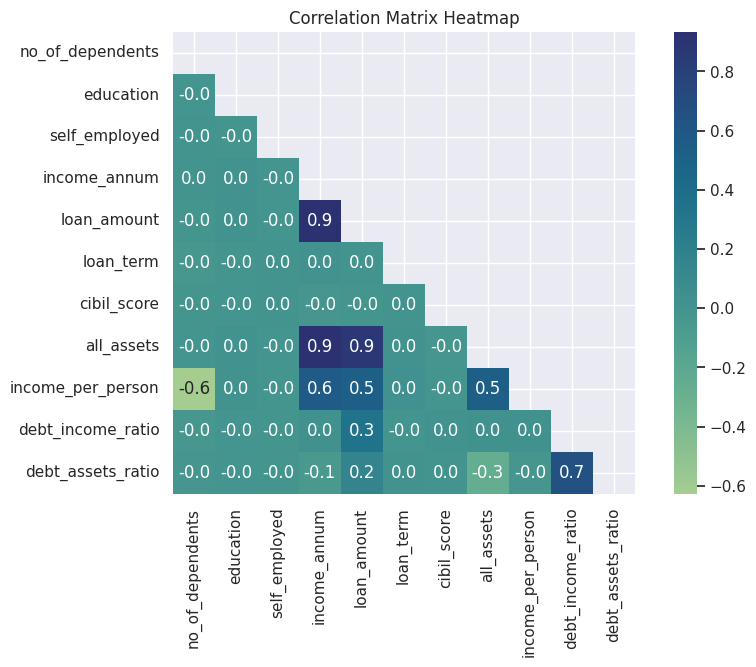

In [802]:
plt.figure(figsize=(10, 6))
correlation_matrix = X_train.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,  mask=mask, cmap="crest", annot=True, fmt=".1f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Let's remove loan_amount and income_annum since they have the highest VIF values and show strong correlations with other variables.

In [812]:
X_train_f = X_train.drop(['loan_amount', 'income_annum'], axis=1)
vifs = check_vif(X_train_f)
vifs.sort_values(by='VIF', ascending=False)

,feature,VIF
6,income_per_person,3.39
5,all_assets,2.35
0,no_of_dependents,2.34
8,debt_assets_ratio,2.17
7,debt_income_ratio,1.96
3,loan_term,1.00
4,cibil_score,1.00
1,education,1.00
2,self_employed,1.00


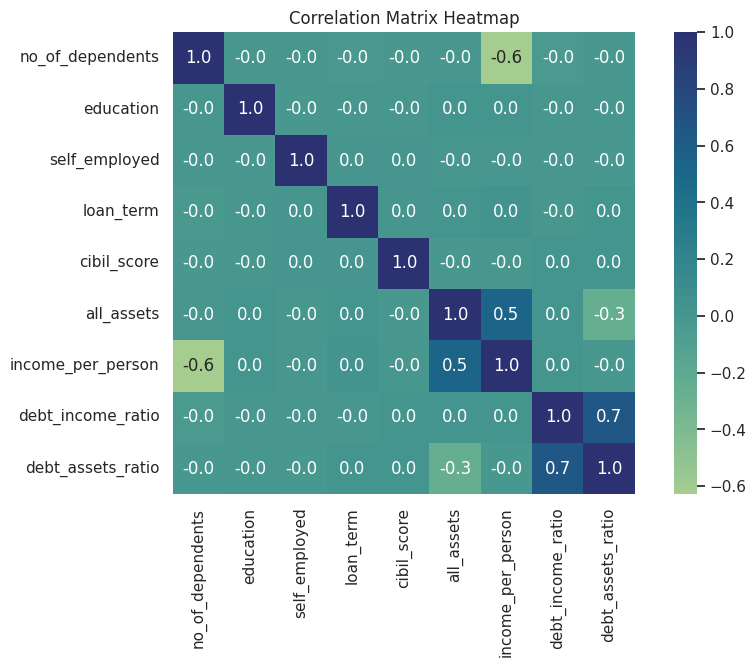

In [813]:
plt.figure(figsize=(10, 6))
correlation_matrix = X_train_f.corr()
sns.heatmap(correlation_matrix, cmap="crest", annot=True, fmt=".1f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [817]:
X_train_f = X_train_f.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

### Preliminary model

In [818]:
x1 = sm.add_constant(X_train_f)
reg_log = sm.Logit(y_train, x1)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.214094
         Iterations 8


In [819]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3842
Model:                          Logit   Df Residuals:                     3832
Method:                           MLE   Df Model:                            9
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.6775
Time:                        21:42:28   Log-Likelihood:                -822.55
converged:                       True   LL-Null:                       -2550.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8471      0.091     20.329      0.000       1.669       2.025
no_of_dependents      0.0619      0.095      0.650      0.516      -0.125       0.249
education             0.0690      0.063      1.092      0.275      -0.055       0.193
self_employed         0.0344      0.063      0.545      0.586      -0.089       0.158
loan_term            -0.8493      0.070    -12.179      0.000      -0.986      -0.713
cibil_score           4.4286      0.159     27.770      0.000       4.116       4.741
all_assets           -0.2442      0.095     -2.565      0.010      -0.431      -0.058
income_per_person     0.1691      0.112      1.506      0.132      -0.051       0.389
debt_income_ratio     0.9205      0.096      9.539      0.000       0.731       1.110
debt_assets_ratio    -0.5341      0.099     -5.388      0.000      -0.728      -0.340
=====================================================================================
"""

In Model  the p-values for

'no_of_dependents',
'self_employed',
'education',
'income_per_person'

 are greater than 0.05, suggesting that their coefficients are not significantly different from zero and do not add explanatory power to the model. Therefore, I will remove them

### Final model

In [838]:
# Remove insignificant for model variables

X_train_f = X_train.drop(['loan_amount', 'income_annum','no_of_dependents', 'self_employed', 'education', 'income_per_person'], axis=1).reset_index(drop=True)
y_train_f = y_train.reset_index(drop=True)

X_test_f = X_test.drop(['loan_amount', 'income_annum', 'no_of_dependents', 'self_employed', 'education', 'income_per_person'], axis=1).reset_index(drop=True)
y_test_f = y_test.reset_index(drop=True)

In [839]:
# Run new regression
x1 = sm.add_constant(X_train_f)
reg_log = sm.Logit(y_train_f, x1)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.214639
         Iterations 8


In [840]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 3842
Model:                          Logit   Df Residuals:                     3836
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.6767
Time:                        22:26:38   Log-Likelihood:                -824.64
converged:                       True   LL-Null:                       -2550.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8430      0.091     20.346      0.000       1.665       2.021
loan_term            -0.8399      0.069    -12.127      0.000      -0.976      -0.704
cibil_score           4.4162      0.159     27.845      0.000       4.105       4.727
all_assets           -0.1420      0.067     -2.106      0.035      -0.274      -0.010
debt_income_ratio     0.8848      0.093      9.474      0.000       0.702       1.068
debt_assets_ratio    -0.4877      0.095     -5.150      0.000      -0.673      -0.302
=====================================================================================
"""

For logistic regression, the effect of a predictor variable on the odds of the target event is given by the exponential of the coefficient

In [831]:
print(f'Odds of getting a loan decrease by a factor of {np.exp(-0.8399):.4f} for each 1 unit increase in loan_term.')
print(f'Odds of getting a loan increase by a factor of {np.exp(4.4162):.4f} for each 1 unit increase in cibil_score.')
print(f'Odds of getting a loan decrease by a factor of {np.exp(-0.1420):.4f} for each 1 unit increase in all_assets.')
print(f'Odds of getting a loan increase by a factor of {np.exp(0.8848):.4f} for each 1 unit increase in debt_income_ratio.')
print(f'Odds of getting a loan decrease by a factor of {np.exp(-0.4877):.4f} for each 1 unit increase in debt_assets_ratio.')

Odds of getting a loan decrease by a factor of 0.4318 for each 1 unit increase in loan_term.
Odds of getting a loan increase by a factor of 82.7811 for each 1 unit increase in cibil_score.
Odds of getting a loan decrease by a factor of 0.8676 for each 1 unit increase in all_assets.
Odds of getting a loan increase by a factor of 2.4225 for each 1 unit increase in debt_income_ratio.
Odds of getting a loan decrease by a factor of 0.6140 for each 1 unit increase in debt_assets_ratio.


**The CIBIL Score and Loan Term seem to have a substantial impact, possibly indicating that longer loan terms and lower credit scores might negatively influence approval chances, while having a higher debt-income ratio might  increase the odds.**

## Model accuracy

In [841]:
def confusion_matrix(data, actual_values, model):
    data = sm.add_constant(data)
    pred_values = model.predict(data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    df = pd.DataFrame(data=cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    accuracy = format(accuracy, '.3f')
    print(f'Model Accuracy: {accuracy} %')
    return df

In [842]:
confusion_matrix(X_train_f, y_train_f, results_log)

Model Accuracy: 0.915 %


,Predicted 0,Predicted 1
Actual 0,"1,289.00",170.00
Actual 1,157.00,"2,226.00"


## Test model


In [844]:
results = confusion_matrix(X_test_f, y_test_f, results_log)
results

Model Accuracy: 0.913 %


,Predicted 0,Predicted 1
Actual 0,136.00,18.00
Actual 1,19.00,254.00


In [846]:
m_rate = (results.iloc[0,1]+ results.iloc[1, 0]) / (results['Predicted 0'].sum() + results['Predicted 1'].sum())

print(f'Misclassification rate: {m_rate}')

Misclassification rate: 0.08665105386416862


High Accuracy: The model has a high accuracy for both the training (91.5%) and test sets (91.3%), suggesting it can distinguish between approved and not-approved loans effectively.


Low Misclassification: A relatively low misclassification rate (8.66%) on the test set indicates that the model's predictions are reliable.

The logistic regression model for loan approval performs well, showing strong predictive capability on both training and test datasets with minimal overfitting. While the false positive and false negative counts are relatively low, depending on the business context (e.g., the cost of a wrongly approved loan), additional steps like adjusting decision thresholds or adding more informative features could be considered to reduce errors further